In [10]:
import pandas as pd
from os.path import join
import missingno as msno

In [11]:
df = pd.read_csv(join('data', 'raw_new_data.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nom                    10000 non-null  object 
 1   prenom                 10000 non-null  object 
 2   age                    10000 non-null  int64  
 3   taille                 10000 non-null  float64
 4   poids                  10000 non-null  float64
 5   sexe                   10000 non-null  object 
 6   sport_licence          10000 non-null  object 
 7   niveau_etude           10000 non-null  object 
 8   region                 10000 non-null  object 
 9   smoker                 10000 non-null  object 
 10  nationalité_francaise  10000 non-null  object 
 11  orientation_sexuelle   10000 non-null  object 
 12  nb_enfants             10000 non-null  int64  
 13  quotient_caf           10000 non-null  float64
 14  revenu_estime_mois     10000 non-null  int64  
 15  sit

In [12]:
df.describe()

,age,taille,poids,nb_enfants,quotient_caf,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,4692.000000,10000.000000,4744.000000,7029.000000,10000.000000
mean,46.678800,169.98452,69.864350,1.612800,249.383700,2513.953300,2.506820,0.502380,574.779722,5306.473284,8063.179078
std,16.669812,9.88310,14.808592,1.393223,99.722026,1142.281228,1.688411,0.290901,154.978890,3773.366242,10781.678081
min,18.000000,129.80000,11.700000,-4.000000,-103.900000,500.000000,0.000000,0.000000,300.000000,-245.100000,500.000000
25%,32.000000,163.40000,59.700000,1.000000,182.300000,1688.000000,1.000000,0.250000,443.000000,1007.750000,500.000000
50%,47.000000,170.00000,69.800000,2.000000,250.200000,2496.000000,3.000000,0.500000,574.000000,5000.000000,646.306057
75%,61.000000,176.60000,80.000000,3.000000,316.300000,3294.000000,4.000000,0.760000,705.000000,10000.000000,13755.555527
max,75.000000,208.40000,132.200000,8.000000,621.200000,7358.000000,5.000000,1.000000,849.000000,10000.000000,60000.000000


<Axes: >

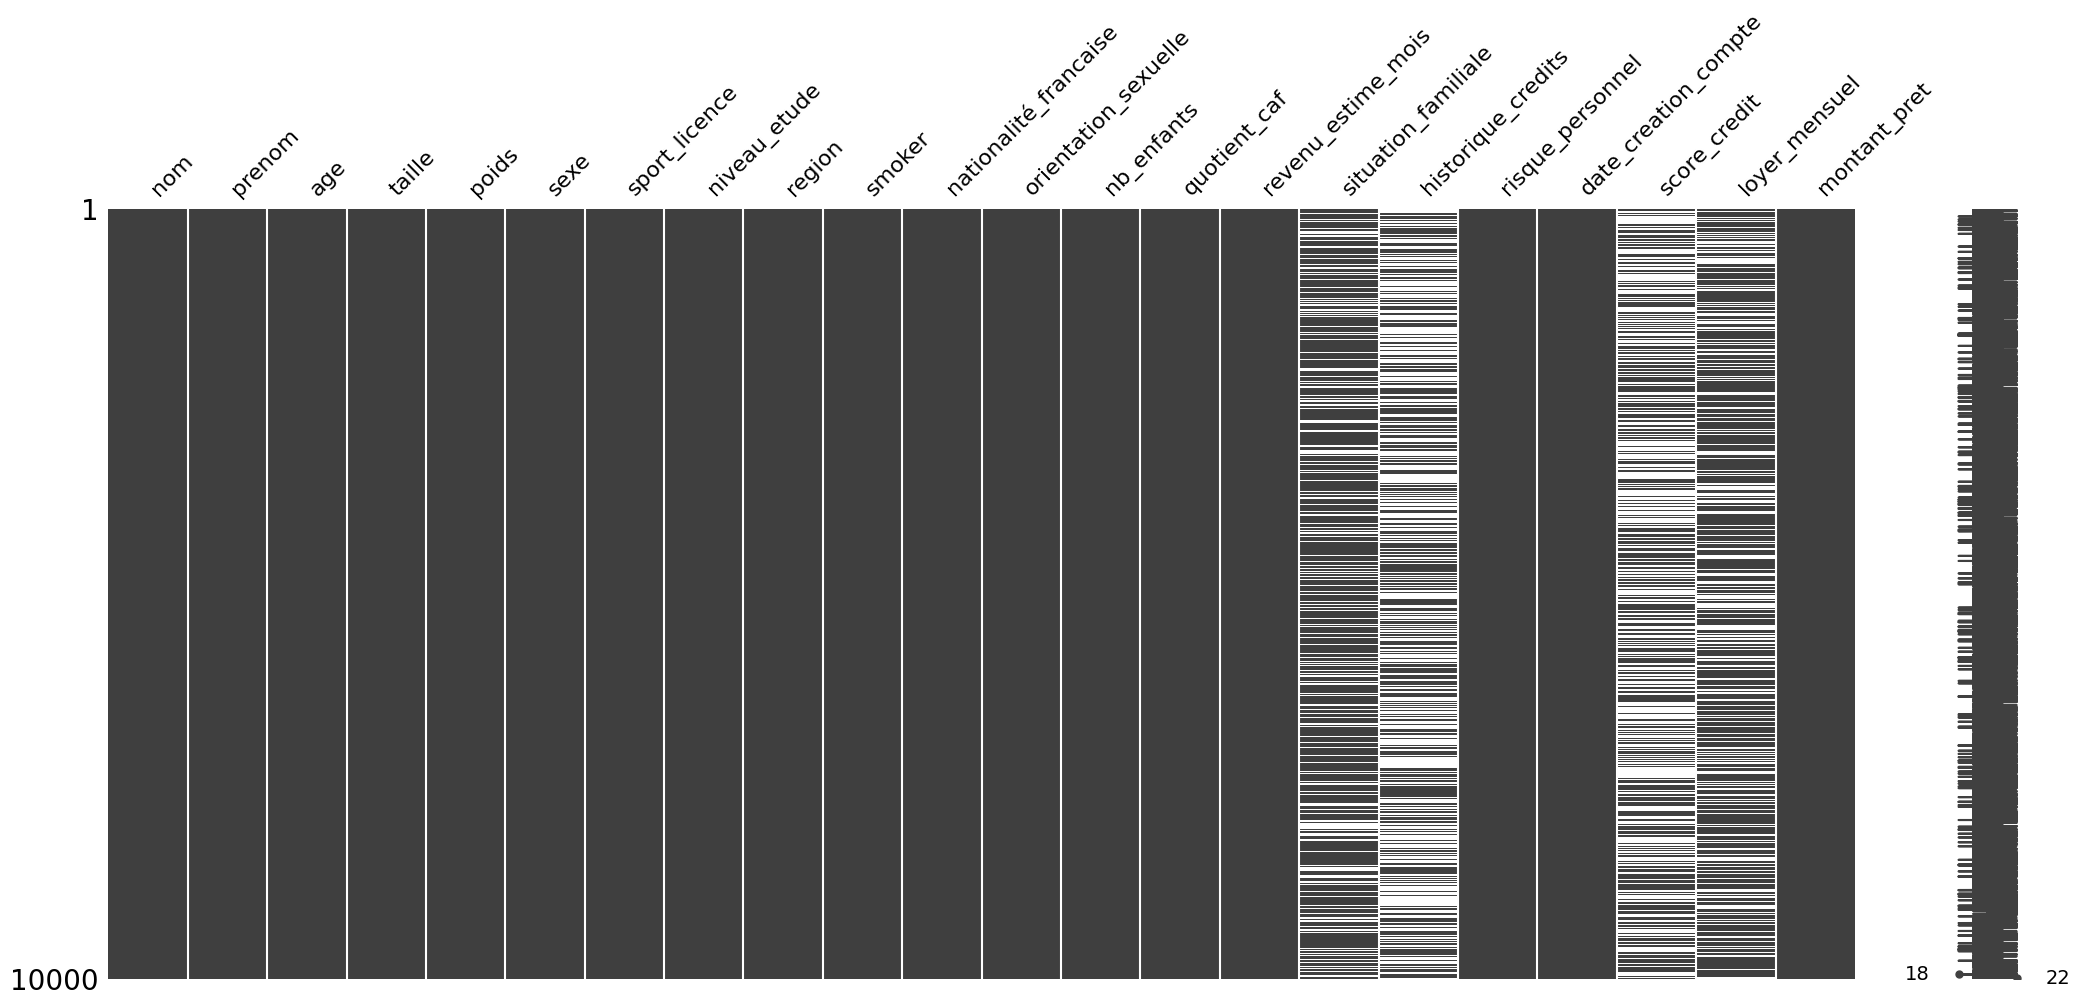

In [13]:
msno.matrix(df)

In [14]:
cols_to_drop = ['nom', 'prenom', 'orientation_sexuelle', 'date_creation_compte']
for col in cols_to_drop:
    if col not in df.columns:
        print(f"Column '{col}' not found in DataFrame.")
    else:
        print(f"Column '{col}' will be dropped.")
        df = df.drop(columns=col)
df.columns

Column 'nom' will be dropped.
Column 'prenom' will be dropped.
Column 'orientation_sexuelle' will be dropped.
Column 'date_creation_compte' will be dropped.


Index(['age', 'taille', 'poids', 'sexe', 'sport_licence', 'niveau_etude',
       'region', 'smoker', 'nationalité_francaise', 'nb_enfants',
       'quotient_caf', 'revenu_estime_mois', 'situation_familiale',
       'historique_credits', 'risque_personnel', 'score_credit',
       'loyer_mensuel', 'montant_pret'],
      dtype='object')

In [15]:
situation_familiale_mode = df['situation_familiale'].mode()
df['situation_familiale'] = df['situation_familiale'].fillna(situation_familiale_mode[0])

loyer_mensuel_mean = df['loyer_mensuel'].mean()
df['loyer_mensuel'] = df['loyer_mensuel'].fillna(loyer_mensuel_mean)

historique_credits_mean = df['historique_credits'].mean()
df['historique_credits'] = df['historique_credits'].fillna(historique_credits_mean)

score_credit_mean = df['score_credit'].mean()
df['score_credit'] = df['score_credit'].fillna(score_credit_mean)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    10000 non-null  int64  
 1   taille                 10000 non-null  float64
 2   poids                  10000 non-null  float64
 3   sexe                   10000 non-null  object 
 4   sport_licence          10000 non-null  object 
 5   niveau_etude           10000 non-null  object 
 6   region                 10000 non-null  object 
 7   smoker                 10000 non-null  object 
 8   nationalité_francaise  10000 non-null  object 
 9   nb_enfants             10000 non-null  int64  
 10  quotient_caf           10000 non-null  float64
 11  revenu_estime_mois     10000 non-null  int64  
 12  situation_familiale    10000 non-null  object 
 13  historique_credits     10000 non-null  float64
 14  risque_personnel       10000 non-null  float64
 15  sco

<Axes: >

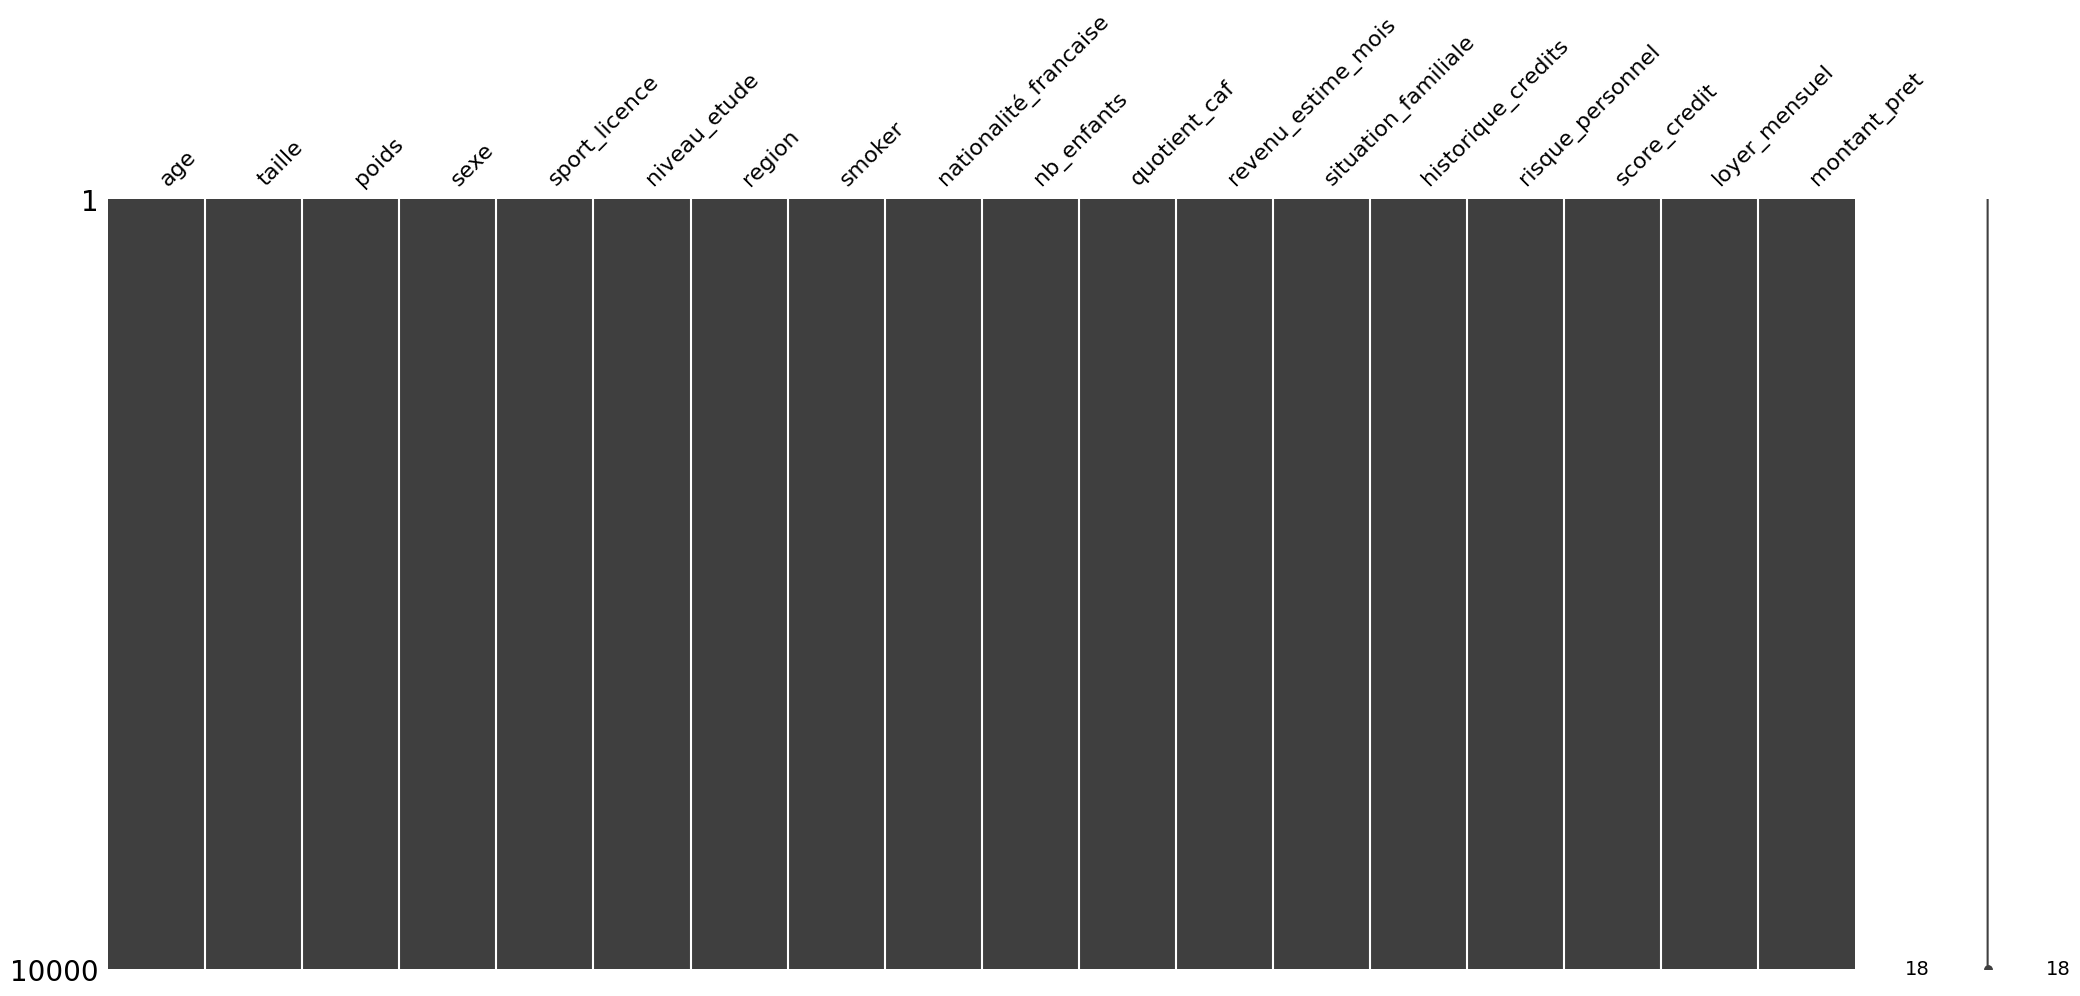

In [16]:
msno.matrix(df)

In [17]:
# df.to_csv(join('data', 'preprocessed_new_data.csv'), index=False)